# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists to storage data
city_list = []
country = []
date = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []

In [4]:
#Create API to make the call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
base_url = f"{url}appid={weather_api_key}&units={units}&q="
base_url

'http://api.openweathermap.org/data/2.5/weather?appid=1a93c7c3f5a164b9beed55297dd43624&units=imperial&q='

In [5]:
# Set counters
counter = 0
set_counter = 1

print ("Beginning Data Retrieval")
print ("----------------------------------")

# Build the loop to perform a request for data on each city of the list
for city in cities:
    response = requests.get(base_url + city).json()
    print(f"Processing Record # : {counter} of Set {set_counter} | {city}")
    try:
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        if counter >= 50:
            counter = 1
            set_counter += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
    except:
        print("City not found. Skipping request...")
        pass
    
print ("----------------------------------")
print ("Data Retrieval Complete")

Beginning Data Retrieval
----------------------------------
Processing Record # : 0 of Set 1 | rio gallegos
Processing Record # : 1 of Set 1 | abalak
Processing Record # : 2 of Set 1 | mnogovershinnyy
Processing Record # : 3 of Set 1 | avarua
Processing Record # : 4 of Set 1 | busselton
Processing Record # : 5 of Set 1 | narsaq
Processing Record # : 6 of Set 1 | souillac
Processing Record # : 7 of Set 1 | hillsborough
Processing Record # : 8 of Set 1 | taolanaro
City not found. Skipping request...
Processing Record # : 8 of Set 1 | stephenville
Processing Record # : 9 of Set 1 | new norfolk
Processing Record # : 10 of Set 1 | barrow
Processing Record # : 11 of Set 1 | lac du bonnet
Processing Record # : 12 of Set 1 | hobart
Processing Record # : 13 of Set 1 | barentsburg
City not found. Skipping request...
Processing Record # : 13 of Set 1 | mataura
Processing Record # : 14 of Set 1 | tasiilaq
Processing Record # : 15 of Set 1 | kahului
Processing Record # : 16 of Set 1 | kapaa
Process

Processing Record # : 7 of Set 4 | pevek
Processing Record # : 8 of Set 4 | dawlatabad
Processing Record # : 9 of Set 4 | eyl
Processing Record # : 10 of Set 4 | newberry
Processing Record # : 11 of Set 4 | bengkulu
Processing Record # : 12 of Set 4 | grand river south east
City not found. Skipping request...
Processing Record # : 12 of Set 4 | tiksi
Processing Record # : 13 of Set 4 | vestmanna
Processing Record # : 14 of Set 4 | east london
Processing Record # : 15 of Set 4 | brae
Processing Record # : 16 of Set 4 | khani
Processing Record # : 17 of Set 4 | sorland
Processing Record # : 18 of Set 4 | yarmouth
Processing Record # : 19 of Set 4 | chokurdakh
Processing Record # : 20 of Set 4 | kruisfontein
Processing Record # : 21 of Set 4 | touros
Processing Record # : 22 of Set 4 | margate
Processing Record # : 23 of Set 4 | chuy
Processing Record # : 24 of Set 4 | camden
Processing Record # : 25 of Set 4 | bargal
City not found. Skipping request...
Processing Record # : 25 of Set 4 |

Processing Record # : 8 of Set 7 | sobolevo
Processing Record # : 9 of Set 7 | yenagoa
Processing Record # : 10 of Set 7 | vitim
Processing Record # : 11 of Set 7 | tommot
Processing Record # : 12 of Set 7 | telhara
Processing Record # : 13 of Set 7 | birao
Processing Record # : 14 of Set 7 | saint-pascal
City not found. Skipping request...
Processing Record # : 14 of Set 7 | wanning
Processing Record # : 15 of Set 7 | lagoa
Processing Record # : 16 of Set 7 | basco
Processing Record # : 17 of Set 7 | cockburn town
Processing Record # : 18 of Set 7 | palabuhanratu
City not found. Skipping request...
Processing Record # : 18 of Set 7 | estelle
Processing Record # : 19 of Set 7 | prince rupert
Processing Record # : 20 of Set 7 | atasu
Processing Record # : 21 of Set 7 | mastic beach
Processing Record # : 22 of Set 7 | veraval
Processing Record # : 23 of Set 7 | port macquarie
Processing Record # : 24 of Set 7 | mangalia
Processing Record # : 25 of Set 7 | vostok
Processing Record # : 26 

Processing Record # : 29 of Set 10 | lindi
Processing Record # : 30 of Set 10 | mims
Processing Record # : 31 of Set 10 | talnakh
Processing Record # : 32 of Set 10 | shubarshi
Processing Record # : 33 of Set 10 | pringsewu
Processing Record # : 34 of Set 10 | copiapo
Processing Record # : 35 of Set 10 | yefimovskiy
City not found. Skipping request...
Processing Record # : 35 of Set 10 | kitgum
Processing Record # : 36 of Set 10 | arras
Processing Record # : 37 of Set 10 | ballina
Processing Record # : 38 of Set 10 | goderich
Processing Record # : 39 of Set 10 | linguere
Processing Record # : 40 of Set 10 | koyelga
Processing Record # : 41 of Set 10 | formosa
Processing Record # : 42 of Set 10 | sao joao da barra
Processing Record # : 43 of Set 10 | dvinskoy
Processing Record # : 44 of Set 10 | bolshoye sorokino
City not found. Skipping request...
Processing Record # : 44 of Set 10 | kaputa
Processing Record # : 45 of Set 10 | marcona
City not found. Skipping request...
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, temperature, latitude, cloudiness and wind speed
weather_dict = {
    "City": city_list,
    "Country": country,
    "Date": date,
    "Temperature": temp,
    "Latitude": lat,
    "Longitude": long,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

In [7]:
#Export to csv
weather_data.to_csv('output_data/cities.csv',encoding = 'utf-8',index = False)

weather_data.count()

City           592
Country        592
Date           592
Temperature    592
Latitude       592
Longitude      592
Humidity       592
Cloudiness     592
Wind Speed     592
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Print dataframe
weather_data

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,kalmunai,AR,1627324892,42.85,-51.6226,-69.2181,75,75,19.57
1,kalmunai,RU,1627325159,53.35,58.1286,68.5944,77,68,4.72
2,kalmunai,RU,1627325159,62.02,53.9353,139.9242,93,100,3.47
3,kalmunai,CK,1627325159,75.25,-21.2078,-159.7750,88,40,8.05
4,kalmunai,AU,1627325160,55.09,-33.6500,115.3333,68,100,34.20
...,...,...,...,...,...,...,...,...,...
587,kalmunai,FR,1627325342,69.48,44.5000,2.5833,64,0,6.91
588,kalmunai,AU,1627325342,62.58,-15.7667,128.7333,88,100,1.14
589,kalmunai,RU,1627325342,65.17,58.6881,99.1844,64,6,3.62
590,kalmunai,BR,1627325342,78.53,-8.0089,-34.8553,69,40,11.50


In [9]:
# Check if any city has more than 100% humidity
weather_data.describe()

,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
count,5.920000e+02,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,1.627325e+09,71.116841,20.576874,13.623767,67.819257,51.300676,8.078868
std,8.251041e+01,14.702212,33.265102,89.170497,21.238460,39.550873,5.515563
min,1.627325e+09,36.430000,-54.800000,-175.200000,5.000000,0.000000,0.000000
25%,1.627325e+09,60.780000,-8.514175,-66.551400,55.000000,9.750000,4.160000
50%,1.627325e+09,72.005000,23.566700,17.262850,72.000000,54.000000,6.910000
75%,1.627325e+09,81.410000,49.394225,90.290075,84.000000,91.000000,10.835000
max,1.627325e+09,108.770000,78.218600,179.316700,100.000000,100.000000,34.520000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

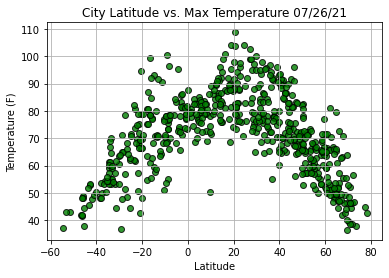

In [10]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Temperature"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color ='green')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature.png")

### This graphic shows that the cities with -60, -40 and 60 in latitude has the same temperature. It also shows that the cities in latitudes between 20 and 40 have the highest max temperature.

## Latitude vs. Humidity Plot

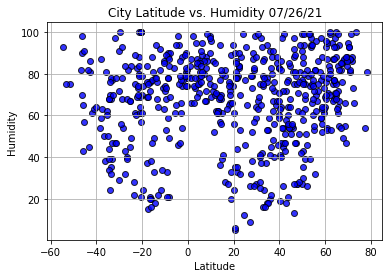

In [11]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color ='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {time.strftime('%m/%d/%y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Humidity.png")

### This plot shows that the majority of the cities have humidity aorund 60% and 100% 

## Latitude vs. Cloudiness Plot

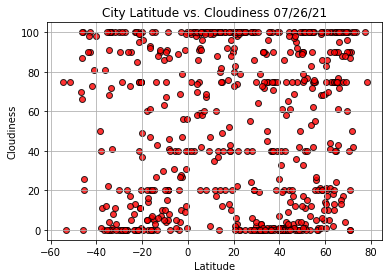

In [12]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color ='red')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%m/%d/%y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

### This plot shows that there are many cities that have 0% cloudiness and 100% cloudiness and it doesn´t depend of the lalitude

## Latitude vs. Wind Speed Plot

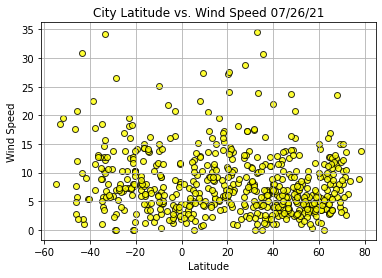

In [27]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color = 'yellow')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%m/%d/%y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
#sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

### The wind speed is between 0 and 15 mph in most of the cities. This doesn´t depend of the latitude either.

## Linear Regression

In [14]:
#Create datafram for northern hemisphere and southern hemisphere
north_hemisphere = weather_data.loc[(weather_data['Latitude']>0)]
south_hemisphere = weather_data.loc[(weather_data['Latitude']<0)]

In [15]:
#Print north hemisphere dataframe
north_hemisphere

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
1,kalmunai,RU,1627325159,53.35,58.1286,68.5944,77,68,4.72
2,kalmunai,RU,1627325159,62.02,53.9353,139.9242,93,100,3.47
5,kalmunai,GL,1627325160,66.42,60.9167,-46.0500,54,17,3.74
7,kalmunai,US,1627325160,77.29,37.5741,-122.3794,76,75,5.01
8,kalmunai,US,1627325161,97.93,32.2207,-98.2023,42,1,0.00
...,...,...,...,...,...,...,...,...,...
585,kalmunai,IT,1627325341,67.08,46.6166,10.7002,89,12,3.85
586,kalmunai,CA,1627325054,71.26,52.1667,-103.5343,26,15,8.61
587,kalmunai,FR,1627325342,69.48,44.5000,2.5833,64,0,6.91
589,kalmunai,RU,1627325342,65.17,58.6881,99.1844,64,6,3.62


In [16]:
#Print south hemisphere dataframe
south_hemisphere

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,kalmunai,AR,1627324892,42.85,-51.6226,-69.2181,75,75,19.57
3,kalmunai,CK,1627325159,75.25,-21.2078,-159.7750,88,40,8.05
4,kalmunai,AU,1627325160,55.09,-33.6500,115.3333,68,100,34.20
6,kalmunai,MU,1627325160,66.58,-20.5167,57.5167,100,75,10.36
9,kalmunai,AU,1627325161,52.75,-42.7826,147.0587,81,100,1.01
...,...,...,...,...,...,...,...,...,...
578,kalmunai,AU,1627325338,54.00,-32.7167,152.1500,70,8,12.77
579,kalmunai,ZM,1627325339,53.73,-9.3727,30.1250,53,90,9.66
581,kalmunai,PF,1627325339,80.62,-17.5333,-149.3333,75,16,8.79
588,kalmunai,AU,1627325342,62.58,-15.7667,128.7333,88,100,1.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.6978748626609896


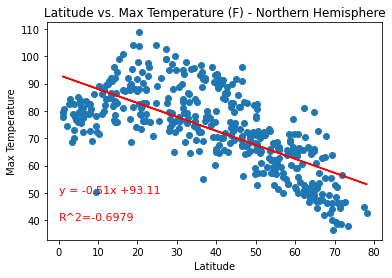

In [17]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Temperature']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=11,color="red")
plt.annotate(r2,(0,40),fontsize=11,color="red")
plt.title("Latitude vs. Max Temperature (F) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#print and save
plt.savefig ("Latitude vs. Max Temperature - Northern Hemisphere.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (R^2) is = 0.7305501626686418


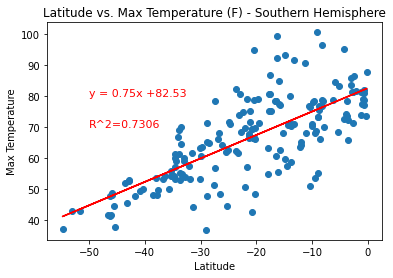

In [18]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Temperature']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=11,color="red")
plt.annotate(r2,(-50,70),fontsize=11,color="red")
plt.title("Latitude vs. Max Temperature (F) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#print and save
plt.savefig ("Latitude vs. Max Temperature - Southern Hemisphere.png")
plt.show()

### The Northern Hemisphere plot showed that the relationship between latitude and temperature is negative, meaning that the greater the latitude the temperature is going to be lower. However, in the southern hemisphere, the regression is positive, showing that the temperature increases when the latitude increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = 0.07356344047480602


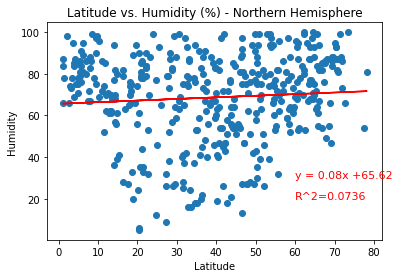

In [19]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Humidity']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=11,color="red")
plt.annotate(r2,(60,20),fontsize=11,color="red")
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print and save
plt.savefig ("Latitude vs. Humidity - Northern Hemisphere.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = 0.08147328384745607


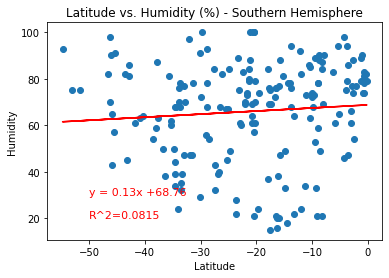

In [20]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Humidity']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=11,color="red")
plt.annotate(r2,(-50,20),fontsize=11,color="red")
plt.title("Latitude vs. Humidity (%) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print and save
plt.savefig ("Latitude vs. Humidity - Southern Hemisphere.png")
plt.show()

### Both plots show that the lalitude doesn´t influence the humidity as much. As we can see the coefficient is very low in both hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.11320300016277715


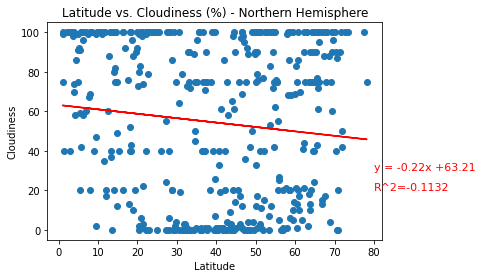

In [21]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Cloudiness']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,30),fontsize=11,color="red")
plt.annotate(r2,(80,20),fontsize=11,color="red")
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print and save
plt.savefig ("Latitude vs. Cloudiness - Northern Hemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.13559554523548623


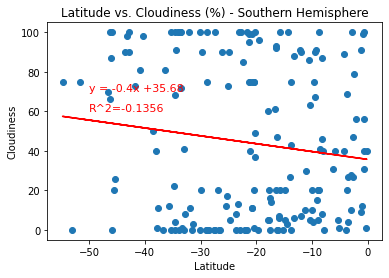

In [22]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Cloudiness']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=11,color="red")
plt.annotate(r2,(-50,60),fontsize=11,color="red")
plt.title("Latitude vs. Cloudiness (%) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print and save
plt.savefig ("Latitude vs. Cloudiness - Southern Hemisphere.png")
plt.show()

### Both in the northern and southern hemispheres, the latitude has a low influence in the cloudiness. According to the linear regression every time latitude goes down, cloudiness goes down.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.09619935465062818


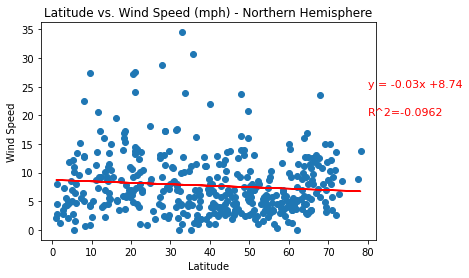

In [23]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Wind Speed']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,25),fontsize=11,color="red")
plt.annotate(r2,(80,20),fontsize=11,color="red")
plt.title("Latitude vs. Wind Speed (mph) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print and save
plt.savefig ("Latitude vs. Wind Speed - Northern Hemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.2178687994496952


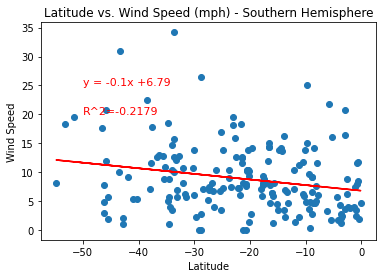

In [24]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Wind Speed']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=11,color="red")
plt.annotate(r2,(-50,20),fontsize=11,color="red")
plt.title("Latitude vs. Wind Speed (mph) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print and save
plt.savefig ("Latitude vs. Wind Speed - Southern Hemisphere.png")
plt.show()

### Both graphics show that the latitude and the wind speed in both hemisphere has a negative relationship, showing that everytime the lalitude decrease the wind speed also decrease. In the Southern Hemisohere graphic, the relationship is more remarkable but in the Northen Hemisphere plot it is not.